In [1]:
import numpy as np
from matplotlib import pyplot as plt
import py_gauge_mc
import os
from tqdm.notebook import tqdm

In [2]:
def make_graph(l, inv_ks,vlen=100):
    vn = np.einsum('i,j->ij', inv_ks, np.arange(vlen)**2)
    graph = py_gauge_mc.GPUGaugeTheory((l,l,l,l),vn.astype(np.float32))
    return graph

In [3]:
inv_ks = np.linspace(0.1,1.0,64)

In [4]:
graph = make_graph(8, inv_ks)
graph.simulate(steps=100,local_updates_per_step=10)
w_v = graph.simulate_and_get_winding_variance(1000,local_updates_per_step=10,steps_per_sample=100)

In [10]:
graph.get_violations()

[((0, [0, 4, 4, 0], 0),
  [(0, [0, 4, 4, 0, 0]),
   (0, [0, 4, 4, 0, 1]),
   (0, [0, 4, 4, 0, 2]),
   (0, [0, 3, 4, 0, 0]),
   (0, [0, 4, 3, 0, 1]),
   (0, [0, 4, 4, 7, 2])]),
 ((0, [0, 4, 4, 2], 3),
  [(0, [7, 4, 4, 2, 2]),
   (0, [0, 3, 4, 2, 4]),
   (0, [0, 4, 3, 2, 5]),
   (0, [0, 4, 4, 2, 2]),
   (0, [0, 4, 4, 2, 4]),
   (0, [0, 4, 4, 2, 5])]),
 ((0, [0, 4, 4, 5], 3),
  [(0, [7, 4, 4, 5, 2]),
   (0, [0, 3, 4, 5, 4]),
   (0, [0, 4, 3, 5, 5]),
   (0, [0, 4, 4, 5, 2]),
   (0, [0, 4, 4, 5, 4]),
   (0, [0, 4, 4, 5, 5])]),
 ((0, [0, 4, 5, 1], 3),
  [(0, [7, 4, 5, 1, 2]),
   (0, [0, 3, 5, 1, 4]),
   (0, [0, 4, 4, 1, 5]),
   (0, [0, 4, 5, 1, 2]),
   (0, [0, 4, 5, 1, 4]),
   (0, [0, 4, 5, 1, 5])]),
 ((0, [0, 4, 5, 2], 2),
  [(0, [7, 4, 5, 2, 1]),
   (0, [0, 3, 5, 2, 3]),
   (0, [0, 4, 5, 2, 5]),
   (0, [0, 4, 5, 2, 1]),
   (0, [0, 4, 5, 2, 3]),
   (0, [0, 4, 5, 1, 5])]),
 ((0, [0, 4, 5, 3], 3),
  [(0, [7, 4, 5, 3, 2]),
   (0, [0, 3, 5, 3, 4]),
   (0, [0, 4, 4, 3, 5]),
   (0, [0, 4, 5, 3, 2

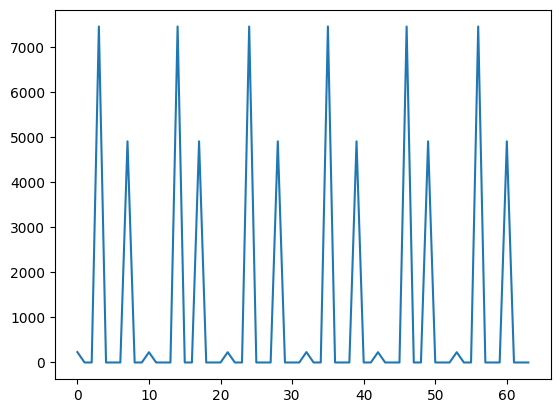

In [8]:
plt.plot(w_v.mean(axis=-1))

In [5]:
for i in range(w_v.shape[-1]):
    plt.plot(inv_ks, w_v[0,:,i], c='gray', alpha=0.25)

plt.plot(inv_ks, w_v.mean(axis=(0,-1)), c='red')

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [ ]:
graph = make_graph(8, inv_ks)
graph.simulate(steps=100,local_updates_per_step=10,run_parallel_tempering=True)
w_v_par = graph.simulate_and_get_winding_variance(1000,local_updates_per_step=10,steps_per_sample=100,run_parallel_tempering=True)
par_swap = graph.get_parallel_tempering_success_rate()

In [ ]:
for i in range(w_v_par.shape[-1]):
    plt.plot(inv_ks, w_v_par[0,:,i], c='gray', alpha=0.25)

plt.plot(inv_ks, w_v_par.mean(axis=(0,-1)), c='red')

In [ ]:
graph = make_graph(8, inv_ks)
graph.set_heatbath(True)
graph.simulate(steps=100,local_updates_per_step=10,run_parallel_tempering=True)
w_v_par_heatbath = graph.simulate_and_get_winding_variance(1000,local_updates_per_step=10,steps_per_sample=100,run_parallel_tempering=True)
heat_swap = graph.get_parallel_tempering_success_rate()

In [ ]:
for i in range(w_v_par_heatbath.shape[-1]):
    plt.plot(inv_ks, w_v_par_heatbath[0,:,i], c='gray', alpha=0.25)

plt.plot(inv_ks, w_v_par_heatbath.mean(axis=(0,-1)), c='red')

In [ ]:
plt.plot(inv_ks, w_v.mean(axis=-1), label='Default')
plt.plot(inv_ks, w_v_par.mean(axis=-1), c='red', label='Parallel Tempering')
plt.plot(inv_ks, w_v_par_heatbath.mean(axis=-1), c='red', label='Heatbath Tempering')

plt.xlabel('1/K')
plt.ylabel(r'$\langle W^2 \rangle$')
plt.legend()
plt.show()

In [ ]:
plt.plot((inv_ks[:-1] + inv_ks[1:]) / 2.0, par_swap, label='Metro')
plt.plot((inv_ks[:-1] + inv_ks[1:]) / 2.0, heat_swap, label='Heat')
plt.xlabel('1/K')
plt.ylabel('Parallel Tempering Swap Chance')
plt.legend()
plt.show()